# Projeto Ciência de Dados - Previsão de Vendas

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

# Projeto Ciência de Dados - Previsão de Vendas


In [1]:
import matplotlib

import seaborn

#### Importar a Base de dados

In [2]:
import pandas as pd

tabela = pd.read_csv('advertising.csv')
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

<function matplotlib.pyplot.show(*args, **kw)>

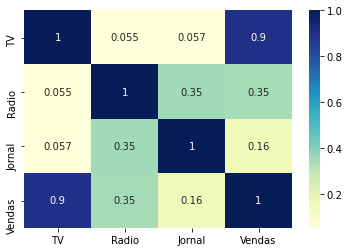

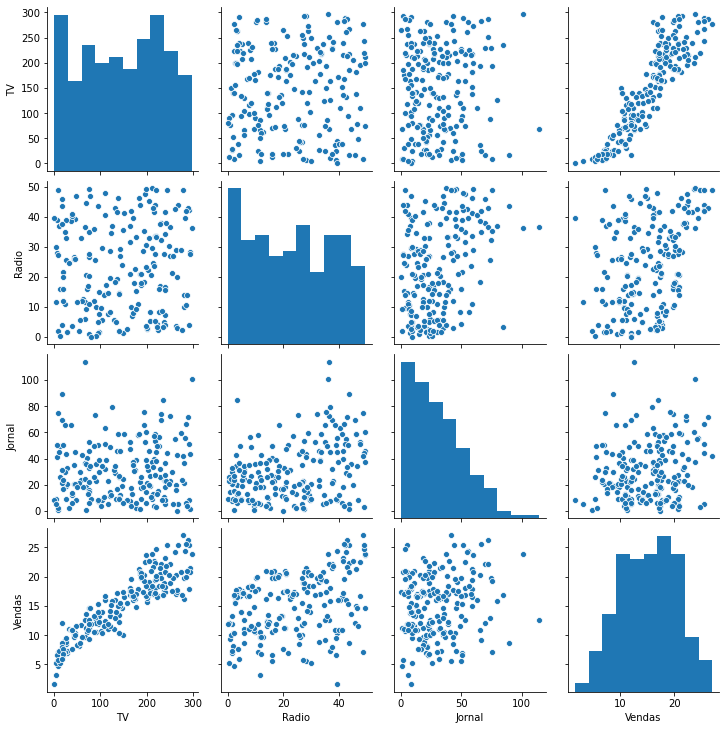

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(tabela.corr(), annot= True, cmap= 'YlGnBu')
plt.show

sns.pairplot(tabela)
plt.show

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [4]:
from sklearn.model_selection import train_test_split

y = tabela["Vendas"]
x = tabela.drop("Vendas", axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 1 )

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

mrl = LinearRegression()
mad = RandomForestRegressor()

mrl.fit(x_train, y_train)
mad.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [6]:
from sklearn import metrics

prl = mrl.predict(x_test)
pad = mad.predict(x_test)

print(metrics.r2_score(y_test, prl))
print(metrics.r2_score(y_test, pad))  

0.9071151423684273
0.9618742635602218


#### Visualização Gráfica das Previsões

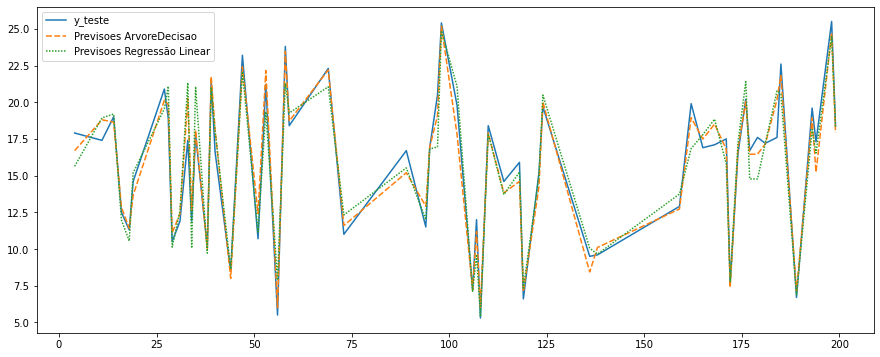

In [7]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_test
tabela_auxiliar["Previsoes ArvoreDecisao"] = pad
tabela_auxiliar["Previsoes Regressão Linear"] = prl

plt.figure(figsize=(15,6))
sns.lineplot(data=tabela_auxiliar)
plt.show()

#### Qual a importância de cada variável para as vendas?

TV        29408.5
Radio      4652.8
Jornal     6110.8
dtype: float64


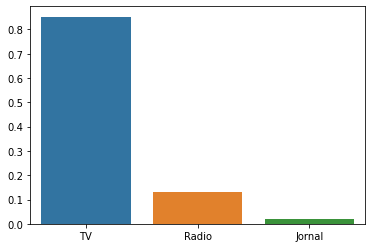

In [8]:
sns.barplot(x=x_train.columns, y=mad.feature_importances_)
print(tabela[["TV", "Radio", "Jornal"]].sum())
plt.show()

In [9]:
ntabela= pd.read_csv('novos.csv')
display(ntabela)
previsao = mad.predict(ntabela)
print(previsao)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


[ 7.836  8.835 19.733]
